In [1]:
import time
import random
import pandas as pd
import numpy as np
import requests
import json

#user="read-8600404121062e38c60c0de150eadf71"
user="2615aa2d9a9c4e1d63a9b961b018cc68"
#pwd="gXO/8avXOh1hYe8F3ocOcSSybfDtOIQE1O8qGwVW"
pwd="q6x-RFUjwvc_rdhGyCLeKxkSrDiHNcA07e0pL6EO"
url_ravelry="https://api.ravelry.com/"

In [40]:
url="https://api.ravelry.com/patterns/search.json"

In [2]:
def get_text_allpage(url,content='favorites'):
    output=requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd),data={'page_size': 40}).json()
    num_pages=output['paginator']['last_page']
    data=output[content]
    for page in range(2,num_pages+1):
        output=requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd),
                              data={'page_size': 40,'page': page}).json()
        data.extend(output[content])
        #print(page)
        
    return data


In [3]:
#my id 6859076
url="https://api.ravelry.com/people/1000000.json"

def get_text_onepage(url):
    result = requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd)).json()
    return result


In [57]:
get_api_result(url)

{'user': {'fave_curse': None,
  'first_name': None,
  'id': 1000000,
  'location': '',
  'username': 'arainboz',
  'tiny_photo_url': None,
  'small_photo_url': None,
  'photo_url': None,
  'large_photo_url': None,
  'about_me': None,
  'about_me_html': None,
  'user_sites': []}}

In [78]:
url="https://api.ravelry.com/people/13.json"
result = requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd)).json()

# get user id, names, locations

In [31]:
import time
import random
import pandas as pd
import numpy as np
import requests
import json

user="2615aa2d9a9c4e1d63a9b961b018cc68"
#pwd="gXO/8avXOh1hYe8F3ocOcSSybfDtOIQE1O8qGwVW"
pwd="q6x-RFUjwvc_rdhGyCLeKxkSrDiHNcA07e0pL6EO"

def get_text_onepage(url):
    result = requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd)).json()
    return result

job_id=0
id_per_job=90#000
start=job_id*id_per_job
end=(job_id+1)*id_per_job
user_id_all=np.load('user_id_random.npy')
user_id=user_id_all[start:end]

user_df=[]
start_time=time.time()
for i in user_id:
    
    series={}
    #series['user_id']=i
    url="https://api.ravelry.com/people/"+str(i)+".json"
    #print(url)
    try:
        user_data=get_api_result(url)['user']
    except :
        continue
    user_name=user_data['username']
    location=user_data['location']
    series['user_name']=user_name
    series['location']=location
    user_df=pd.DataFrame(series,index=[i])
    user_df.index.name ="user_id"
    #user_df.set_index('user_id')
    filename='user_'+str(job_id)+'.csv'
    f = open(filename, 'a')
    user_df.to_csv(f,sep="^", header = False)
    f.close()
    
end_time=time.time()
print(end_time-start_time)

#df=pd.DataFrame(user_df)
#df=df.set_index('user_id')
#outfile='users_'+str(job_id)+'.pkl'
#df.to_pickle(outfile)
#df.to_pickle("./userID_5000.pkl")

#random.seed(a=1)
#num_max=9000000
#user_id_all=random.sample(range(1,num_max+1),num_max)

14.51728105545044


In [88]:
df=pd.read_pickle("users_47.pkl")
#df[df['location']=='Baltimore, Maryland']
df=df.reset_index()
#df.user_name
#print(len(df.index.unique()))
#df['user_name'].value_counts()

In [89]:
#column_names = ["user_id", "username", "location",'created_at',"yarn_id",
 #              "yarn_permalink","yarn_weight"]

#df_fav=pd.DataFrame(columns = column_names)
#df_fav[:3]=df.iloc[200]
#df_fav[:3]
df.iloc[200]

user_id                      962100
user_name           Knit-considered
location     Amsterdam, Netherlands
Name: 200, dtype: object

# Faves

In [73]:
url_ravelry="https://api.ravelry.com/"

#for i in df.index:
#    url_user=url_ral+"people/"+str(i)+'.json'

#user_id=5471957 
#df=df[df.user_name!='inactive']
#print(df.loc[user_id]['user_name'])

#url_fav_list=url_ravelry+'people/'+df.loc[user_id]['user_name']+'/favorites/list.json'
series=df.iloc[200]
url_fav_list=url_ravelry+'people/'+series.user_name+'/favorites/list.json'
fav_list=get_text_allpage(url_fav_list,content='favorites')

# if no fav: fav_list=[]

#x=[]
#for f in fav_list:
#    x.append(f['type'])

#def get_yarn(df):
set(x)
    
#    return yarn

{'designer', 'pattern', 'project', 'yarnbrand', 'yarnshop'}

## Favorite lists first, bundles later

In [163]:
#import pickle
#with open("fav_list.pkl", 'rb') as f:
#    fav_list=pickle.load(f)
#fav_list[0]

user_dat=df.iloc[7215]

def favorites_per_user(user_dat,filename):
    url_fav_list=url_ravelry+'people/'+user_dat.user_name+'/favorites/list.json'
    fav_list=get_text_allpage(url_fav_list,content='favorites')



    column_names = ["user_id", "username", "location",'time',"yarn_id",
              "yarn_permalink","yarn_weight"]
    df_fav=pd.DataFrame(columns = column_names)
    #df_fav=pd.DataFrame(current_user)

    for f in fav_list:
        current_fav={"user_id":user_dat.user_id, "username":user_dat.user_name,
              "location":user_dat.location}
        current_fav['time']=f['created_at']
        fav_type=f['type']

        if fav_type == 'pattern':
            content=f['favorited']
            item_id=content['id']
            item_url=url_ravelry+'patterns/'+str(item_id)+'.json'
            item=get_api_result(item_url)
            pat_designer=content['designer']['name']
            #print('ha')

            if item['pattern']['packs'] and \
                item['pattern']['packs'][0]['yarn_id']: 
                # if pattern specifies yarn
                #print('yarn')
                yarn_packs=item['pattern']['packs']
                for y in yarn_packs:
                    if y['yarn_id'] :
                        current_fav['yarn_id']=y['yarn_id']
                    if y['yarn']['permalink']:
                        current_fav['yarn_permalink']=y['yarn']['permalink']
                    if y['yarn_weight']:
                        current_fav['yarn_weight']=y['yarn_weight']['name']

                    #df_fav=df_fav.append(current_fav,ignore_index=True)  
                    index=str(user_dat.user_id)+' '+current_fav['time']
                    current_save=pd.DataFrame(current_fav,
                                             index=[index])
                    #add to file
                    f = open(filename, 'a')
                    current_save.to_csv(f,sep="^", header = False)
                    f.close()
    #return df_fav
            

In [162]:
#len(fav_yarns.keys())
#item['pattern']['packs']
#df_fav=favorites_per_user(user_dat,'x')
#user_dat
#df_fav

In [198]:
### multiple users favs
filename='user_fav.csv'
df_baltimore=df[df.location=='Baltimore'].iloc[:3]
for index, row in df_baltimore.iterrows():
    if row.user_id == 1767190:
        continue
    favorites_per_user(row,filename)
    print(row.user_id,row.user_name,'fav loaded')

568553 kribby101 fav loaded
1824653 mmccaul1 fav loaded


In [170]:
df[df.location=='Towson,Maryland']

,user_id,user_name,location


### 6/3 start here

In [78]:
import pickle
#fav_list
with open('fav_list.pkl', 'wb') as f:
     pickle.dump(fav_list, f)

In [77]:
import pickle

In [32]:
np.save('user_id_random.npy',user_id)

### 6/4 start here

In [73]:
x=pd.read_csv("user_fav.csv",header=0,sep='^') #baltmore sample

In [74]:
x.iloc[0]['time'][:10]

'2020/06/02'

In [186]:
t=pd.to_datetime(x.iloc[0]['time'][:10])

In [187]:
t

Timestamp('2020-06-02 00:00:00')

In [188]:
t0=pd.to_datetime('2020-07')

In [189]:
t0-t

Timedelta('29 days 00:00:00')

In [191]:
url=url_ravelry+'yarn_weights.json'
yarnweight=get_text_onepage(url)

In [195]:
for i in yarnweight['yarn_weights']:
    print(i['name'],i['ply'])

Aran 10
Bulky 12
Fingering 4
Super Bulky None
Lace 2
Cobweb 1
Thread None
Sport 5
DK 8
Worsted 10
Light Fingering 3
Any gauge None
Jumbo None


## pop by location

In [202]:
df_pop=x.reset_index()
df_pop.drop(columns=['index'],inplace=True)
df_pop

,user_id,username,location,time,yarn_id,yarn_permalink,yarn_weight
0,1767190,michira,Baltimore,2020/06/02 20:57:41 -0400,107238,orange-flower-yarn-dk-250,DK
1,1767190,michira,Baltimore,2020/06/02 20:57:41 -0400,134670,orange-flower-yarn-bfl-silk-dk,DK
2,1767190,michira,Baltimore,2020/06/02 20:57:41 -0400,147546,orange-flower-yarn-polwarth,DK
3,1767190,michira,Baltimore,2020/06/01 01:40:16 -0400,59108,hedgehog-fibres-sock,Fingering
4,1767190,michira,Baltimore,2020/04/12 22:00:37 -0400,1872,lion-brand-wool-ease-thick--quick,Super Bulky
5,1767190,michira,Baltimore,2020/04/12 21:58:09 -0400,1872,lion-brand-wool-ease-thick--quick,Super Bulky
6,1767190,michira,Baltimore,2020/04/12 21:56:28 -0400,1872,lion-brand-wool-ease-thick--quick,Super Bulky
7,1767190,michira,Baltimore,2020/04/12 21:56:28 -0400,99226,lion-brand-wool-ease-thick--quick-prints,Super Bulky
8,1767190,michira,Baltimore,2020/04/12 21:56:28 -0400,99227,lion-brand-wool-ease-thick--quick-tweeds,Super Bulky
9,1767190,michira,Baltimore,2020/04/12 21:56:28 -0400,113159,lion-brand-wool-ease-thick--quick-stripes,Super Bulky


### aggregate NYC and Austin fav list

In [4]:
file_nyc="fav_list_csv/user_fav_nyc_"
file_austin="fav_list_csv/user_fav_austin_"

In [78]:
fav_nyc=pd.read_csv(file_nyc+'0.csv',header=0,sep='^')
fav_austin=pd.read_csv(file_austin+'0.csv',header=0,sep='^')

for i in range(1,200):
    fn_nyc=file_nyc+str(i)+'.csv'
    fn_austin=file_austin+str(i)+'.csv'
    fnyc=pd.read_csv(fn_nyc,header=0,sep='^')
    faustin=pd.read_csv(fn_austin,header=0,sep='^')
    fav_nyc=fav_nyc.append(fnyc)
    fav_austin=fav_austin.append(faustin)

#### combine diff job_id results

In [5]:
#fav_nyc.to_csv("fav_nyc_all.csv",sep="^")
#fav_austin.to_csv("fav_austin_all.csv",sep="^")
fav_nyc=pd.read_csv("fav_nyc_all.csv",header=0,sep="^")
fav_austin=pd.read_csv("fav_austin_all.csv",header=0,sep="^")


In [8]:
fav_nyc_art=fav_nyc[artisan(fav_nyc['yarn_permalink'])]
fav_austin_art=fav_austin[artisan(fav_austin['yarn_permalink'])]
yarn_pop_nyc=fav_nyc_art.yarn_permalink.value_counts()[:29000]
yarn_pop_austin=fav_austin_art.yarn_permalink.value_counts()[:29000]
yarn_pop_nyc=yarn_pop_nyc.to_frame().reset_index()
yarn_pop_nyc.rename(columns={'index':'yarn_permalink_nyc',
                             'yarn_permalink':'yarn_nyc_count'},inplace=True)
yarn_pop_austin=yarn_pop_austin.to_frame().reset_index()
yarn_pop_austin.rename(columns={'index':'yarn_permalink_austin',
                             'yarn_permalink':'yarn_austin_count'},inplace=True)
yarn_pop=yarn_pop_nyc.join(yarn_pop_austin)

In [269]:
## nyc vs austin
yarn_pop

,yarn_permalink_nyc,yarn_nyc_count,yarn_permalink_austin,yarn_austin_count
0,madelinetosh-tosh-merino-light,11012,madelinetosh-tosh-merino-light,6162.0
1,cascade-yarns-cascade-220,8672,cascade-yarns-cascade-220,5301.0
2,malabrigo-yarn-worsted,7763,malabrigo-yarn-worsted,5022.0
3,brooklyn-tweed-shelter,7567,malabrigo-yarn-sock,4624.0
4,malabrigo-yarn-sock,7406,brooklyn-tweed-shelter,3437.0
5,malabrigo-yarn-rios,6636,malabrigo-yarn-rios,3374.0
6,madelinetosh-tosh-dk,5697,madelinetosh-tosh-dk,3074.0
7,brooklyn-tweed-loft,4556,rohrspatz--wollmeise-pure-100-merino-superwash,2612.0
8,rohrspatz--wollmeise-pure-100-merino-superwash,4238,madelinetosh-tosh-vintage,2179.0
9,knit-picks-palette,3886,madelinetosh-tosh-sock,2173.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


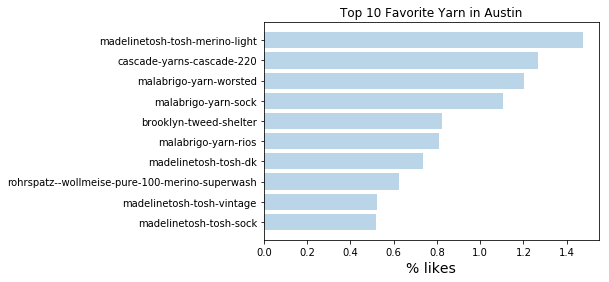

In [279]:
dat=yarn_pop.iloc[:10]
dat.sort_values(by='yarn_austin_count',inplace=True)
plt.barh(dat.yarn_permalink_austin,dat.yarn_austin_count*100/len(fav_austin_art)
         ,alpha=0.3)
plt.xlabel("% likes",fontsize=14)
plt.title("Top 10 Favorite Yarn in Austin")
plt.savefig("yarn_pop_austin_10.png")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


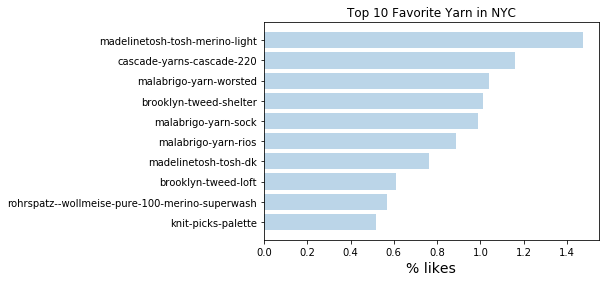

In [281]:
dat=yarn_pop.iloc[:10]
dat.sort_values(by='yarn_nyc_count',inplace=True)
plt.barh(dat.yarn_permalink_nyc,dat.yarn_nyc_count*100/len(fav_nyc_art)
         ,alpha=0.3)
plt.xlabel("% likes",fontsize=14)
plt.title("Top 10 Favorite Yarn in NYC")
plt.savefig("yarn_pop_nyc_10.png")

In [7]:
# drop national brand yarns
yarn_national=['red-heart-','caron-','hobby-lobby','lion-brand',
               'lily-sugarn-cream-','patons-north-america-',
               'loops--threads-','bernat-','stylecraft-',
               'big-twist-','premier-yarns-','craft-smart-',
               'yarn-bee-']

yarn_link='scheepjes-whirl'
def artisan(yarn_link):
    art_yarn=[]
    for link in yarn_link:
        arts=sum([brand in link for brand in yarn_national])
        art_yarn.append(arts==0)
    return art_yarn

#artisan(fav_austin['yarn_permalink'])

In [11]:
fav_nyc_art

,Unnamed: 0,user_id,username,location,time,yarn_id,yarn_permalink,yarn_weight
0,2886061 2020/05/20 11:35:03 -0400,2886061,aylin16,New York,2020/05/20 11:35:03 -0400,128853,blacker-yarns-lyonesse-4-ply,Fingering
1,2886061 2020/05/20 11:30:05 -0400,2886061,aylin16,New York,2020/05/20 11:30:05 -0400,172111,lichen-and-lace-marsh-mohair,Lace
2,2886061 2020/05/20 11:30:05 -0400,2886061,aylin16,New York,2020/05/20 11:30:05 -0400,182412,espace-tricot-grace,Light Fingering
3,2886061 2020/05/10 21:46:36 -0400,2886061,aylin16,New York,2020/05/10 21:46:36 -0400,53539,madelinetosh-tosh-merino-light,Fingering
4,2886061 2019/03/30 21:51:10 -0400,2886061,aylin16,New York,2019/03/30 21:51:10 -0400,158182,laines-du-nord-poema,Light Fingering
5,2886061 2018/08/19 18:58:02 -0400,2886061,aylin16,New York,2018/08/19 18:58:02 -0400,26385,malabrigo-yarn-sock,Light Fingering
6,2886061 2018/08/19 18:58:02 -0400,2886061,aylin16,New York,2018/08/19 18:58:02 -0400,59108,hedgehog-fibres-sock,Fingering
7,2886061 2018/08/19 18:58:02 -0400,2886061,aylin16,New York,2018/08/19 18:58:02 -0400,97832,miss-babs-cosmic-hand-painted-sock,Fingering
8,2886061 2018/08/19 18:56:29 -0400,2886061,aylin16,New York,2018/08/19 18:56:29 -0400,12957,koigu-premium-merino-kpm,Fingering
9,2886061 2018/08/19 18:53:03 -0400,2886061,aylin16,New York,2018/08/19 18:53:03 -0400,5006,malabrigo-yarn-silky-merino,DK


In [47]:
yarn_pop_nyc=yarn_pop_nyc.to_frame().reset_index()
yarn_pop_nyc.rename(columns={'index':'yarn_nyc','yarn_permalink':'yarn_permalink_nyc'},inplace=True)

In [22]:
yarnweight_sd={"Aran":7,"Bulky":8,"Fingering": 3,
               "Super Bulky":9,"Lace": 1,"Cobweb": 0,
               "Thread":0,"Worsted":6,"Sport":4,"DK": 5,
                "Light Fingering": 2,#"Any gauge": None,
                 "Jumbo": 10,"Aran / Worsted":6.5,
              'DK / Sport': 4.5}
sorted(yarnweight_sd.items(), key=lambda x: x[1])
#knit_gauge=np.array([3,9.5,14.5,18,20,22,25,28,32,33])
#wpi=np.array([1,5.5,7,10.5,13,15,20,25,30,40])
#thickness=1./wpi
#thickness*10

[('Cobweb', 0),
 ('Thread', 0),
 ('Lace', 1),
 ('Light Fingering', 2),
 ('Fingering', 3),
 ('Sport', 4),
 ('DK / Sport', 4.5),
 ('DK', 5),
 ('Worsted', 6),
 ('Aran / Worsted', 6.5),
 ('Aran', 7),
 ('Bulky', 8),
 ('Super Bulky', 9),
 ('Jumbo', 10)]

In [121]:
#fav_nyc_art.iloc[0]['time'][:10]
t0=pd.to_datetime(fav_nyc_art.iloc[0]['time'][:10])
data.yarn_weight.unique()

#### convert to time data

In [28]:
# 
def to_time_frame(fav_nyc_art):
    data=fav_nyc_art[['time','yarn_id',
                      'yarn_permalink','yarn_weight']].copy()
    data.dropna(inplace=True)
    data['yarn_thickness'] = np.nan

    data['time'] = data['time'].apply(lambda x: pd.to_datetime(x[:7]))
    
    data['yarn_thickness']=data['yarn_weight'].apply(
                           lambda x:yarnweight_sd[x])

    return data

def to_time_frame_simple(data):
    data_time=data[['time','yarn_thickness']].groupby(['time']).mean()
    data_time['yarn_thickness_std']=data[['time','yarn_thickness']]\
                                    .groupby(['time']).std()
    data_time.rename(columns={'yarn_thickness':'yarn_thickness_mean'},
                     inplace=True)
    return data_time

In [34]:
# format data for plotting, nyc & austin

import matplotlib.pyplot  as plt
import matplotlib.dates as mdates
#data_time.plot()
#plt.show()

yarn_nyc_time=to_time_frame(fav_nyc_art)
data_nyc_plot=to_time_frame_simple(yarn_nyc_time)
yarn_austin_time=to_time_frame(fav_austin_art)
data_austin_plot=to_time_frame_simple(yarn_austin_time)


Text(0, 0.5, 'yarn weight')

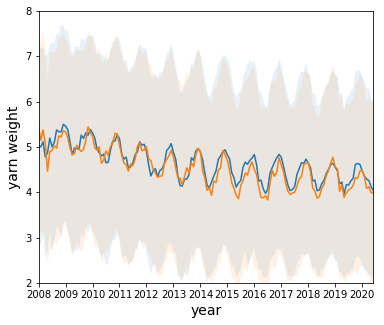

In [56]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(data_nyc_plot.index,data_nyc_plot.yarn_thickness_mean)
upper=data_nyc_plot.yarn_thickness_mean \
        +data_nyc_plot.yarn_thickness_std
lower=data_nyc_plot.yarn_thickness_mean \
        -data_nyc_plot.yarn_thickness_std
ax.fill_between(data_nyc_plot.index, lower, upper, alpha=0.1)

ax.plot(data_austin_plot.index,data_austin_plot.yarn_thickness_mean)
upper=data_austin_plot.yarn_thickness_mean \
        +data_austin_plot.yarn_thickness_std
lower=data_austin_plot.yarn_thickness_mean \
        -data_austin_plot.yarn_thickness_std
ax.fill_between(data_austin_plot.index, lower, upper, alpha=0.1)

ax.set_ylim(2,8)
datemin = np.datetime64('2008')
datemax = np.datetime64(data_nyc_plot.index[-1])
ax.set_xlim(datemin,datemax)
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
#years_fmt = mdates.DateFormatter('%Y')
years = mdates.YearLocator()
#months = mdates.MonthLocator()
ax.xaxis.set_major_locator(years)
ax.set_xlabel('year',fontsize=14)
ax.set_ylabel('yarn weight',fontsize=14)
#ax.xaxis.set_major_formatter(years_fmt)


#ax.set_xlim(datemin, datemax)

In [66]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [40]:
result = adfuller(data_austin_plot.yarn_thickness_mean)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.375139486917538
p-value: 0.1488763820869124
Critical Values:
	1%: -3.477261624048995
	5%: -2.8821181874544233
	10%: -2.5777431104939494


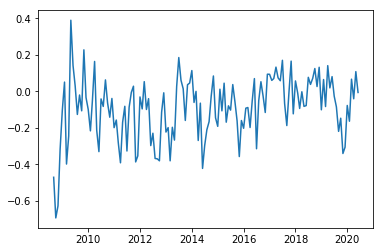

In [143]:
plt.plot(data_austin_plot.yarn_thickness_mean-
        data_austin_plot.yarn_thickness_mean.shift(12))

In [45]:
np.mean(data_austin_plot.yarn_thickness_mean-
        data_austin_plot.yarn_thickness_mean.shift())

-0.009549829004952385

In [263]:
data=data_nyc_plot.yarn_thickness_mean.iloc[10:]
train_data=data.iloc[:8*len(data.index)//10]
test_data=data.iloc[8*len(data.index)//10:]
#model = ARIMA(data, order=(2,0,0))
#results = model.fit(disp=1)
mod = sm.tsa.statespace.SARIMAX(train_data, trend='ct', order=(2,0,0), seasonal_order=(1,0,0,12))
results = mod.fit()
#plt.plot(results.fittedvalues, color='red')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(733773.0, 738156.0)

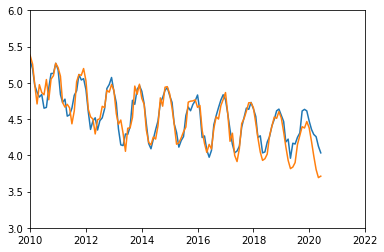

In [265]:
predict=results.predict(0,len(data)-1)
plt.plot(data)
plt.plot(predict)

plt.ylim(3,6)

datemin = np.datetime64('2010')
datemax = np.datetime64('2022')
plt.xlim(datemin,datemax)

In [266]:
#import scikitlearn as sklearn  root mean square error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predict[8*len(data.index)//10:], test_data))

0.2025232521258808

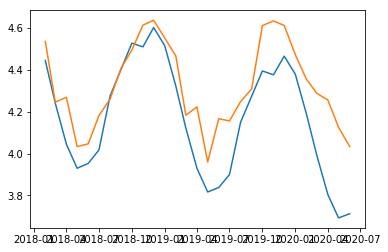

In [267]:
plt.plot(predict[8*len(data.index)//10:]),
plt.plot(test_data)

In [244]:
r2_score(predict[:8*len(data.index)//10], train_data)

0.8665870657644383

In [168]:
results.predict?

In [175]:
for i in range(3):
    for j in range(3):
        for k in range(3):
            mod = sm.tsa.statespace.SARIMAX(train_data, trend='ct', order=(i,j,k), seasonal_order=(1,0,0,12))
            results = mod.fit()
            predict=results.predict(0,len(data)-1)
            print(i,j,k)
            print('train',r2_score(predict[:8*len(data.index)//10], train_data))
            print('test',r2_score(predict[8*len(data.index)//10:], test_data))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/pytho

0 0 0
train 0.7978240740126713
test -0.5484838578613054


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


0 0 1
train 0.7147534082254192
test 0.21951183328333324


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


0 0 2
train 0.8596045287102927
test -1.3552100428846585
0 1 0
train 0.3051533030394088
test -8.118280163192196


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


0 1 1
train 0.29767038264102164
test -8.881772827458791


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/pytho

0 1 2
train 0.26731717654100395
test -2.2724834762454598
0 2 0
train 0.3308367747626697
test -3.008156716821717


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


0 2 1
train 0.32494831003913793
test -2.9020213684996277


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


0 2 2
train 0.3489049755732969
test -6.1445275077856785


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1 0 0
train 0.8665870657644383
test 0.39167752526212496


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/pytho

1 0 1
train 0.8678801989212381
test 0.414417776258614


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1 0 2
train 0.8647085913064916
test 0.354240289919318
1 1 0
train 0.29949565448964555
test -4.993571551728292


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1 1 1
train 0.28924012525294274
test -2.7627460409642217


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

1 1 2
train 0.297440356147451
test -7.21745118612057


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1 2 0
train 0.34387447592540576
test -4.726258999405909


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/pytho

1 2 1
train 0.32811059447678737
test -3.8660120322146163


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1 2 2
train 0.31447485472427084
test -5.004336205756629


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Libra

2 0 0
train 0.8659851352919871
test 0.539524587830445


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2 0 1
train 0.8669953315442698
test 0.37014693262302256


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


2 0 2
train 0.8655222165994632
test 0.3141845321457166
2 1 0
train 0.29415483041533985
test -6.349802453006265


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Libra

2 1 1
train 0.30797803517491384
test -7.823357690634769
2 1 2
train 0.2976107626311919
test -7.140993756299592


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


2 2 0
train 0.340252781516281
test -3.115102122253523


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


2 2 1
train 0.3144556284943325
test -3.1235400187527738


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

2 2 2
train 0.2994370277997068
test -3.683299298322525


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

months=data_austin_plot.index[10:]
six_months = date.today() + relativedelta(months=+6)

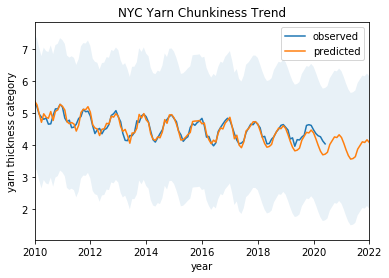

In [268]:
predict=results.predict(0,len(data)+12*2)
plt.plot(data,label='observed')
plt.plot(predict,label='predicted')
plt.legend(loc='best')
#plt.ylim(3,6)

datemin = np.datetime64('2010')
datemax = np.datetime64('2022')
plt.xlim(datemin,datemax)

std=data_austin_plot.yarn_thickness_std.mean()
upper=predict+std
lower=predict-std

plt.fill_between(predict.index,lower, upper, alpha=0.1)
plt.xlabel('year')
plt.ylabel('yarn thickness category')

plt.title('NYC Yarn Chunkiness Trend')
plt.savefig('NYC_yarn_weight.png')

In [240]:
predict.index


DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', length=169, freq='MS')

In [235]:
months=(data_austin_plot.index[10:]).array

In [227]:
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

six_months = date.today() + relativedelta(months=+6)

In [228]:
six_months

datetime.date(2020, 12, 5)

In [233]:
months[-1]#+relativedelta(months=+6)

Timestamp('2020-06-01 00:00:00')

In [236]:
months.append(date.today() + relativedelta(months=+6))

AttributeError: 'DatetimeArray' object has no attribute 'append'